# Class Dataset

In [27]:
from PIL import Image
from torchvision import transforms
from IPython.display import clear_output
import os
import torch
import matplotlib.pyplot as plt
import numpy as np
import time

In [21]:
data_transforms = transforms.Compose([
    transforms.RandomResizedCrop(256),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation((-30, 30)),
    transforms.RandomGrayscale(p=0.3),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [22]:
def imshow(img):
    img = img / 2 + 0.5 # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [23]:
class Dataset(torch.utils.data.Dataset):

    def __init__(self, path_data, transforms):
        self.path_data = path_data
        self.image_paths = os.listdir(self.path_data)
        self.transforms = transforms

    def __len__(self):
        return len(self.image_paths)
    
    def __getitem__(self, idx):
        image = Image.open(os.path.join(self.path_data, self.image_paths[idx]))
        image = self.transforms(image)
        return torch.FloatTensor(image)

In [24]:
train_data = Dataset('data/cats', transforms=data_transforms)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=2, shuffle=True)

In [25]:
imgs = next(iter(train_loader))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.558952..1.7764271].


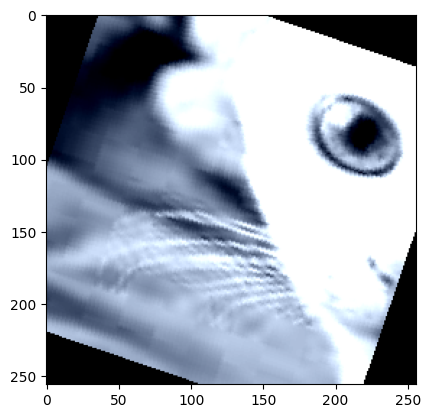

In [26]:
imshow(imgs[0])

We can use this dataloader in a train loop

Example

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.558952..1.6967788].


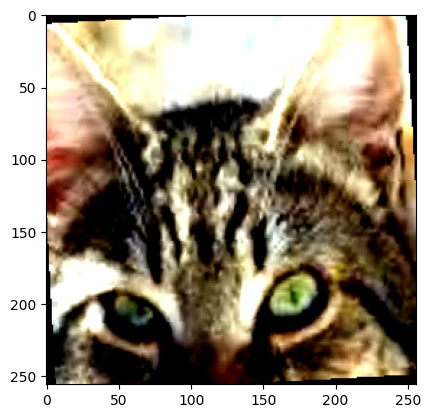

In [28]:
epoch_counts = 5

for epoch in range(epoch_counts):
    for img in train_loader:
        # to train model here
        imshow(img[0])
        time.sleep(2)
        clear_output(True)